# Tidy Data

We often record or receive data organized in a way that superficially seems convenient, but which makes further analysis complicated.

In [5]:
import pandas as pd

In [6]:
wide = pd.read_csv("data/gapminder_all.csv")

In [7]:
wide

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Europe,Switzerland,14734.232750,17909.489730,20431.092700,22966.144320,27195.113040,26982.290520,28397.715120,30281.704590,...,5666000.0,6063000.0,6401400.0,6316424.0,6468126.0,6649942.0,6995447.0,7193761.0,7361757,7554661
138,Europe,Turkey,1969.100980,2218.754257,2322.869908,2826.356387,3450.696380,4269.122326,4241.356344,5089.043686,...,29788695.0,33411317.0,37492953.0,42404033.0,47328791.0,52881328.0,58179144.0,63047647.0,67308928,71158647
139,Europe,United Kingdom,9979.508487,11283.177950,12477.177070,14142.850890,15895.116410,17428.748460,18232.424520,21664.787670,...,53292000.0,54959000.0,56079000.0,56179000.0,56339704.0,56981620.0,57866349.0,58808266.0,59912431,60776238
140,Oceania,Australia,10039.595640,10949.649590,12217.226860,14526.124650,16788.629480,18334.197510,19477.009280,21888.889030,...,10794968.0,11872264.0,13177000.0,14074100.0,15184200.0,16257249.0,17481977.0,18565243.0,19546792,20434176


If we want to plot, e.g., life expectancy vs. year, we can't easily do that. We could loop column-by-column, row-by-row, and parse out the year and the data name, but this situation comes up often enough that we don't have to.

In [8]:
long = pd.wide_to_long(wide,
                       stubnames=["gdpPercap", "lifeExp", "pop"],
                       i=["continent", "country"],
                       j="year",
                       sep="_")

`stubnames` are the part of the column name that we want to turn into  single columns of data.

`i` is a list of the columns to use as the new index.

`j` is the name to assign to the value that comes after the `stubname`.

`sep` is the string that separates the `stubname` from its suffix.

`suffix` is a special string called a regular expression that describes how to interpret `j`. Fortunately for us, by default, it interprets the suffix as a number.

In [14]:
long

gdpPercap  lifeExp         pop
continent country     year                                   
Africa    Algeria     1952   2449.008185   43.077   9279525.0
                      1957   3013.976023   45.685  10270856.0
                      1962   2550.816880   48.303  11000948.0
                      1967   3246.991771   51.407  12760499.0
                      1972   4182.663766   54.518  14760787.0
...                                  ...      ...         ...
Oceania   New Zealand 1987  19007.191290   74.320   3317166.0
                      1992  18363.324940   76.330   3437674.0
                      1997  21050.413770   77.550   3676187.0
                      2002  23189.801350   79.110   3908037.0
                      2007  25185.009110   80.204   4115771.0

[1704 rows x 3 columns]

In this format, we can more easily access subsets of data

In [15]:
long.loc['Africa']

gdpPercap  lifeExp         pop
country  year                                  
Algeria  1952  2449.008185   43.077   9279525.0
         1957  3013.976023   45.685  10270856.0
         1962  2550.816880   48.303  11000948.0
         1967  3246.991771   51.407  12760499.0
         1972  4182.663766   54.518  14760787.0
...                    ...      ...         ...
Zimbabwe 1987   706.157306   62.351   9216418.0
         1992   693.420786   60.377  10704340.0
         1997   792.449960   46.809  11404948.0
         2002   672.038623   39.989  11926563.0
         2007   469.709298   43.487  12311143.0

[624 rows x 3 columns]

In [10]:
long.loc[( 'Africa',     'Algeria', 1962)]

gdpPercap    2.550817e+03
lifeExp      4.830300e+01
pop          1.100095e+07
Name: (Africa, Algeria, 1962), dtype: float64

In [18]:
long.loc[('Africa', 'Algeria'), "pop"]

year
1952     9279525.0
1957    10270856.0
1962    11000948.0
1967    12760499.0
1972    14760787.0
1977    17152804.0
1982    20033753.0
1987    23254956.0
1992    26298373.0
1997    29072015.0
2002    31287142.0
2007    33333216.0
Name: pop, dtype: float64

Rather than the nested index in `wide`, often the most convenient format has one column for each field.

In [17]:
tidy = long.reset_index()

<Axes: xlabel='year'>

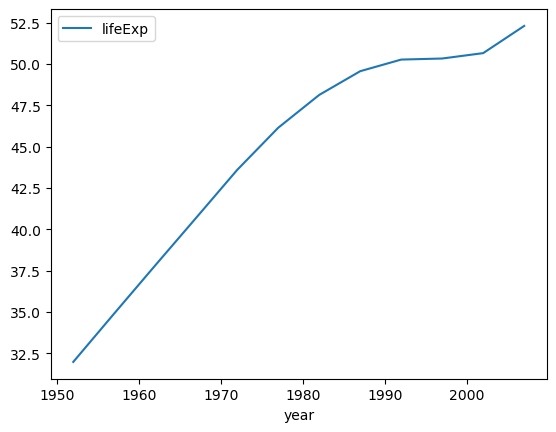

In [18]:
tidy[tidy["country"] == "Burkina Faso"].plot("year", "lifeExp")